<a href="https://colab.research.google.com/github/marinba2200/DL_test/blob/main/Ex_TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN MNIST

## Import library

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


## Import dataset

In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)


## Build ANN

1.   input shape = 28 x 28
2.   units of first layer = 128 with relu
3.   dropout = 20%
4.   units of output layer = 10 with softmax
5.   optimizer = adam'
6.   loss = sparse_categorical_crossentropy
7.   metrics = accuracy

In [ ]:
# Build the model 方法1:一層一層建立model ann

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  #Flatten() 攤平資料
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))  #relu防梯度消失
ann.add(tf.keras.layers.Dropout(0.2)) #Dropout
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
# Compile the ann
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Compile the model 方法2:一次定義model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
#因為二元分類，所以用loss='sparse_categorical_crossentropy'

###Dropout

overfitting model只能敘述已知問題(High Variance：sample太分散，model無法完全罩住)
=> 有看過的都很好，沒看過的都很爛

策略：更多資料(適應更廣範圍)、正則化(讓sample集中)、"Dropout"(網路太深，隨機拿掉幾%的node,*train才會拿掉，test還是會用完整網路)

test_game: http://playground.tensorflow.org

underfittubg model無法正確回答問題(High bias：準心沒有跟sample範圍對上，偏離靶心)
=>有看過跟沒看過都很爛

策略：增加網路深度、訓練時間加長、

overfitting&underfittubg同時存在：sample又分散又偏離靶心
=>資料無法看懂

策略：先解決train的準確率問題、再針對test準確率修正

## Training Model


1.   epochs = 10
2.   use validation data



In [ ]:
# Train the model
r1 = ann.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
#正規化:train,test,validation=>但通常沒有validation，將validation當作test,訓練時就會多一個val_accuracy

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.9149 - val_loss: 0.1377 - val_accuracy: 0.9596
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1415 - accuracy: 0.9580 - val_loss: 0.0956 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9677 - val_loss: 0.0907 - val_accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9731 - val_loss: 0.0779 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0739 - accuracy: 0.9764 - val_loss: 0.0733 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9793 - val_loss: 0.0723 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9818 - val_loss: 0.0752 - val_accuracy:

In [ ]:
# Train the model
r2 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0256 - accuracy: 0.9912 - val_loss: 0.0817 - val_accuracy: 0.9786
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0253 - accuracy: 0.9914 - val_loss: 0.0899 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0232 - accuracy: 0.9917 - val_loss: 0.0853 - val_accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0813 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0226 - accuracy: 0.9917 - val_loss: 0.0803 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0867 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0893 - val_accuracy:

## Plot curves

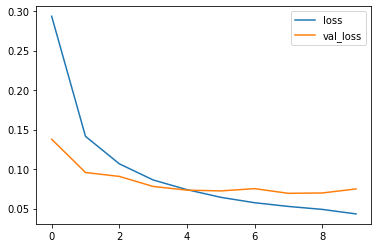

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r1.history['loss'], label='loss')
plt.plot(r1.history['val_loss'], label='val_loss')
plt.legend()

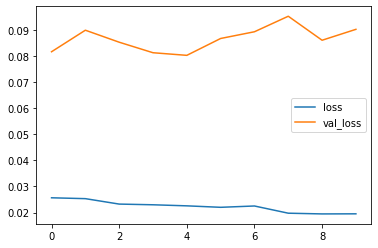

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

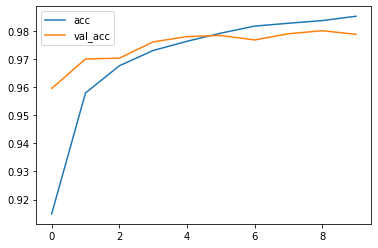

In [ ]:
# Plot accuracy per iteration
plt.plot(r1.history['accuracy'], label='acc')
plt.plot(r1.history['val_accuracy'], label='val_acc')
plt.legend()

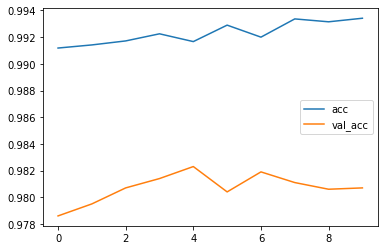

In [ ]:
# Plot accuracy per iteration
plt.plot(r2.history['accuracy'], label='acc')
plt.plot(r2.history['val_accuracy'], label='val_acc')
plt.legend()

## Evaluate model

In [ ]:
# Evaluate the model
print(ann.evaluate(x_test, y_test))

313/313 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9789
[0.07480219751596451, 0.9789000153541565]


In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0903 - accuracy: 0.9807
[0.09025279432535172, 0.9807000160217285]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

p_test_ann = ann.predict(x_test).argmax(axis=1)
print(confusion_matrix(y_test, p_test_ann))
print(classification_report(y_test, p_test_ann))

[[ 973    0    1    1    1    0    1    1    2    0]
 [   0 1129    3    0    0    0    1    0    2    0]
 [   4    0 1016    1    2    0    1    4    4    0]
 [   0    0    7  990    0    3    0    5    1    4]
 [   3    0    2    1  965    0    3    3    2    3]
 [   3    1    0   16    1  857    2    2    8    2]
 [   9    3    2    1    3    5  932    0    3    0]
 [   2    4   10    0    1    0    0 1006    1    4]
 [   4    0    7    7    3    2    1    5  944    1]
 [   2    2    1    4   13    2    0    7    1  977]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98   

In [ ]:
p_test_model = model.predict(x_test).argmax(axis=1)
print(confusion_matrix(y_test, p_test))
print(classification_report(y_test, p_test))

[[ 969    0    1    2    1    0    2    1    3    1]
 [   0 1124    3    1    0    0    1    0    6    0]
 [   3    1 1014    3    2    0    1    5    3    0]
 [   1    0    2  996    0    3    0    4    1    3]
 [   1    0    2    0  967    0    4    1    0    7]
 [   2    0    0   10    0  870    3    1    5    1]
 [   4    3    1    1    6    6  934    0    3    0]
 [   1    5   11    3    1    0    0  999    1    7]
 [   1    2    3    5    5    1    1    5  949    2]
 [   2    4    0    5    6    1    0    4    2  985]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97   

In [ ]:
# Show some misclassified examples
import numpy as np
m = np.where(p_test_ann != y_test)
print(type(m))
print("can't shape")
print(m)
misclassified_idx = np.where(p_test_ann != y_test)[0]
print(type(misclassified_idx))
print(misclassified_idx.shape)
print(misclassified_idx)

<class 'tuple'>
can't shape
(array([ 247,  259,  274,  320,  321,  340,  381,  445,  495,  582,  619,
        691,  720,  726,  810,  817,  844,  951,  965, 1003, 1014, 1039,
       1044, 1112, 1178, 1181, 1182, 1226, 1232, 1247, 1260, 1289, 1299,
       1319, 1393, 1500, 1522, 1530, 1549, 1553, 1681, 1717, 1754, 1790,
       1813, 1878, 1880, 1901, 1941, 1955, 2004, 2016, 2043, 2053, 2070,
       2073, 2098, 2109, 2118, 2129, 2130, 2135, 2162, 2182, 2272, 2291,
       2369, 2387, 2406, 2408, 2414, 2462, 2488, 2526, 2597, 2607, 2648,
       2654, 2743, 2845, 2863, 2877, 2896, 2921, 2927, 2939, 2953, 2970,
       3030, 3073, 3117, 3216, 3289, 3336, 3422, 3503, 3520, 3549, 3558,
       3597, 3604, 3674, 3727, 3751, 3776, 3780, 3801, 3808, 3818, 3838,
       3853, 3906, 3941, 3943, 3948, 3951, 3985, 4065, 4152, 4163, 4176,
       4199, 4224, 4248, 4256, 4259, 4271, 4289, 4306, 4355, 4360, 4369,
       4425, 4497, 4536, 4571, 4601, 4639, 4731, 4740, 4761, 4807, 4814,
       4823, 4833, 488

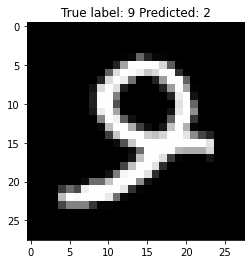

In [ ]:
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test_ann[i]));